In [422]:
import torch
import numpy as np
PATH = '/home/michael/Master-Thesis/CKIM_Competition/exp/Feature_Analysis_Graph-DC_FedVAE_2_out_global_private_NEW_sim_loss_lr_0_1_A0_F0_001_G0_001_H10_I5sim_loss_mse/FedDomSep_GraphDC_gin_on_fs_contest_data_lr0.1_lstep1_/features/client_10'

In [423]:
interm_trains = []
global_trains = []
local_trains = []
labels = []


In [424]:
from glob import glob
import os

all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, '*.pt'))]
all_files.sort()

In [425]:
os.walk(PATH)

<generator object _walk at 0x7f840a03ef90>

In [426]:
for file in all_files:
    file_name = os.path.basename(file)
    file_name_without_ending = file_name[:-3]
    if file_name_without_ending.startswith('global_val') and not file_name_without_ending.endswith('labels'):
        global_trains.append(torch.load(file).cpu().detach().numpy())
    if file_name_without_ending.startswith('interm_val') and not file_name_without_ending.endswith('labels'):
        interm_trains.append(torch.load(file).cpu().detach().numpy())
    if file_name_without_ending.startswith('local_val') and not file_name_without_ending.endswith('labels'):
        local_trains.append(torch.load(file).cpu().detach().numpy())
    if file_name_without_ending.startswith('train') and file_name_without_ending.endswith('labels'):
        labels.append(torch.load(file).cpu().detach().numpy())

In [427]:
interm_train = np.concatenate(interm_trains)
global_train = np.concatenate(global_trains)
local_train = np.concatenate(local_trains)
labels = np.concatenate(labels)

In [428]:
#interm_train

In [429]:
#local_train

In [430]:
np.sum(interm_train != 0)

860

In [431]:
x = interm_train * local_train
x.sum()

3.804703

In [432]:
f = x != 0
f.sum()

457

In [433]:
cos_sim = torch.nn.CosineSimilarity()
x = cos_sim(torch.Tensor(interm_train), torch.Tensor(local_train))

In [434]:
x.mean()

tensor(0.2166)

In [435]:
class DiffLoss(torch.nn.Module):

    def __init__(self):
        super(DiffLoss, self).__init__()

    def forward(self, input1, input2):
        batch_size = input1.size(0)
        input1 = input1.view(batch_size, -1)
        input2 = input2.view(batch_size, -1)

        input1_l2_norm = torch.norm(input1, p=2, dim=1, keepdim=True).detach()
        input1_l2 = input1.div(input1_l2_norm.expand_as(input1) + 1e-6)

        input2_l2_norm = torch.norm(input2, p=2, dim=1, keepdim=True).detach()
        input2_l2 = input2.div(input2_l2_norm.expand_as(input2) + 1e-6)

        diff_loss = torch.mean((input1_l2.t().mm(input2_l2)).pow(2))

        return diff_loss


diffLoss = DiffLoss()
diffLoss(torch.Tensor(interm_train[:64,]), torch.Tensor(local_train[:64, :]))

tensor(0.2004)

In [436]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#global_train = scaler.fit_transform(global_train)
#interm_train = scaler.fit_transform(interm_train)
#local_train = scaler.fit_transform(local_train)

In [437]:
import numpy as np
#concat_X=global_train
concat_X = np.concatenate([global_train, interm_train, local_train])

In [438]:
from sklearn.manifold import TSNE

In [439]:
labels_global = labels.copy()
labels_interm = labels.copy() + 2
labels_local = labels.copy() + 4
labels = np.concatenate([labels_global, labels_interm, labels_local])

In [440]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(concat_X, labels)

In [441]:
X_embedded

array([[-1.12896461e+01,  5.19005346e+00],
       [-9.46401310e+00,  9.26189709e+00],
       [-9.50951195e+00,  5.26300621e+00],
       [ 4.64440250e+00,  3.48393655e+00],
       [-8.12326908e+00, -1.59195411e+00],
       [-1.12363796e+01,  5.80594969e+00],
       [-8.46157932e+00, -1.08586788e+00],
       [-1.31221304e+01,  1.14048147e+01],
       [ 3.87854362e+00,  3.45212793e+00],
       [ 4.20876408e+00,  3.45764542e+00],
       [-1.02875481e+01, -1.03792644e+00],
       [-1.24747896e+01,  8.04867268e+00],
       [-1.16645641e+01,  1.11778727e+01],
       [-1.04026489e+01, -2.07995033e+00],
       [-1.02625370e+01, -1.12792885e+00],
       [-7.63991785e+00,  6.25875092e+00],
       [ 4.20876360e+00,  3.45764494e+00],
       [-9.46614933e+00,  9.26435375e+00],
       [-1.08277464e+01,  4.03460312e+00],
       [-1.01559963e+01,  6.49170637e-01],
       [-1.88534307e+00,  4.49220037e+00],
       [-9.25157261e+00,  4.67563725e+00],
       [-1.13065281e+01, -1.30150020e-01],
       [-8.

In [442]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 18))
plt.rcParams["figure.figsize"] = (30,18)

<Figure size 3000x1800 with 0 Axes>

ValueError: 'c' argument has 603 elements, which is inconsistent with 'x' and 'y' with size 201.

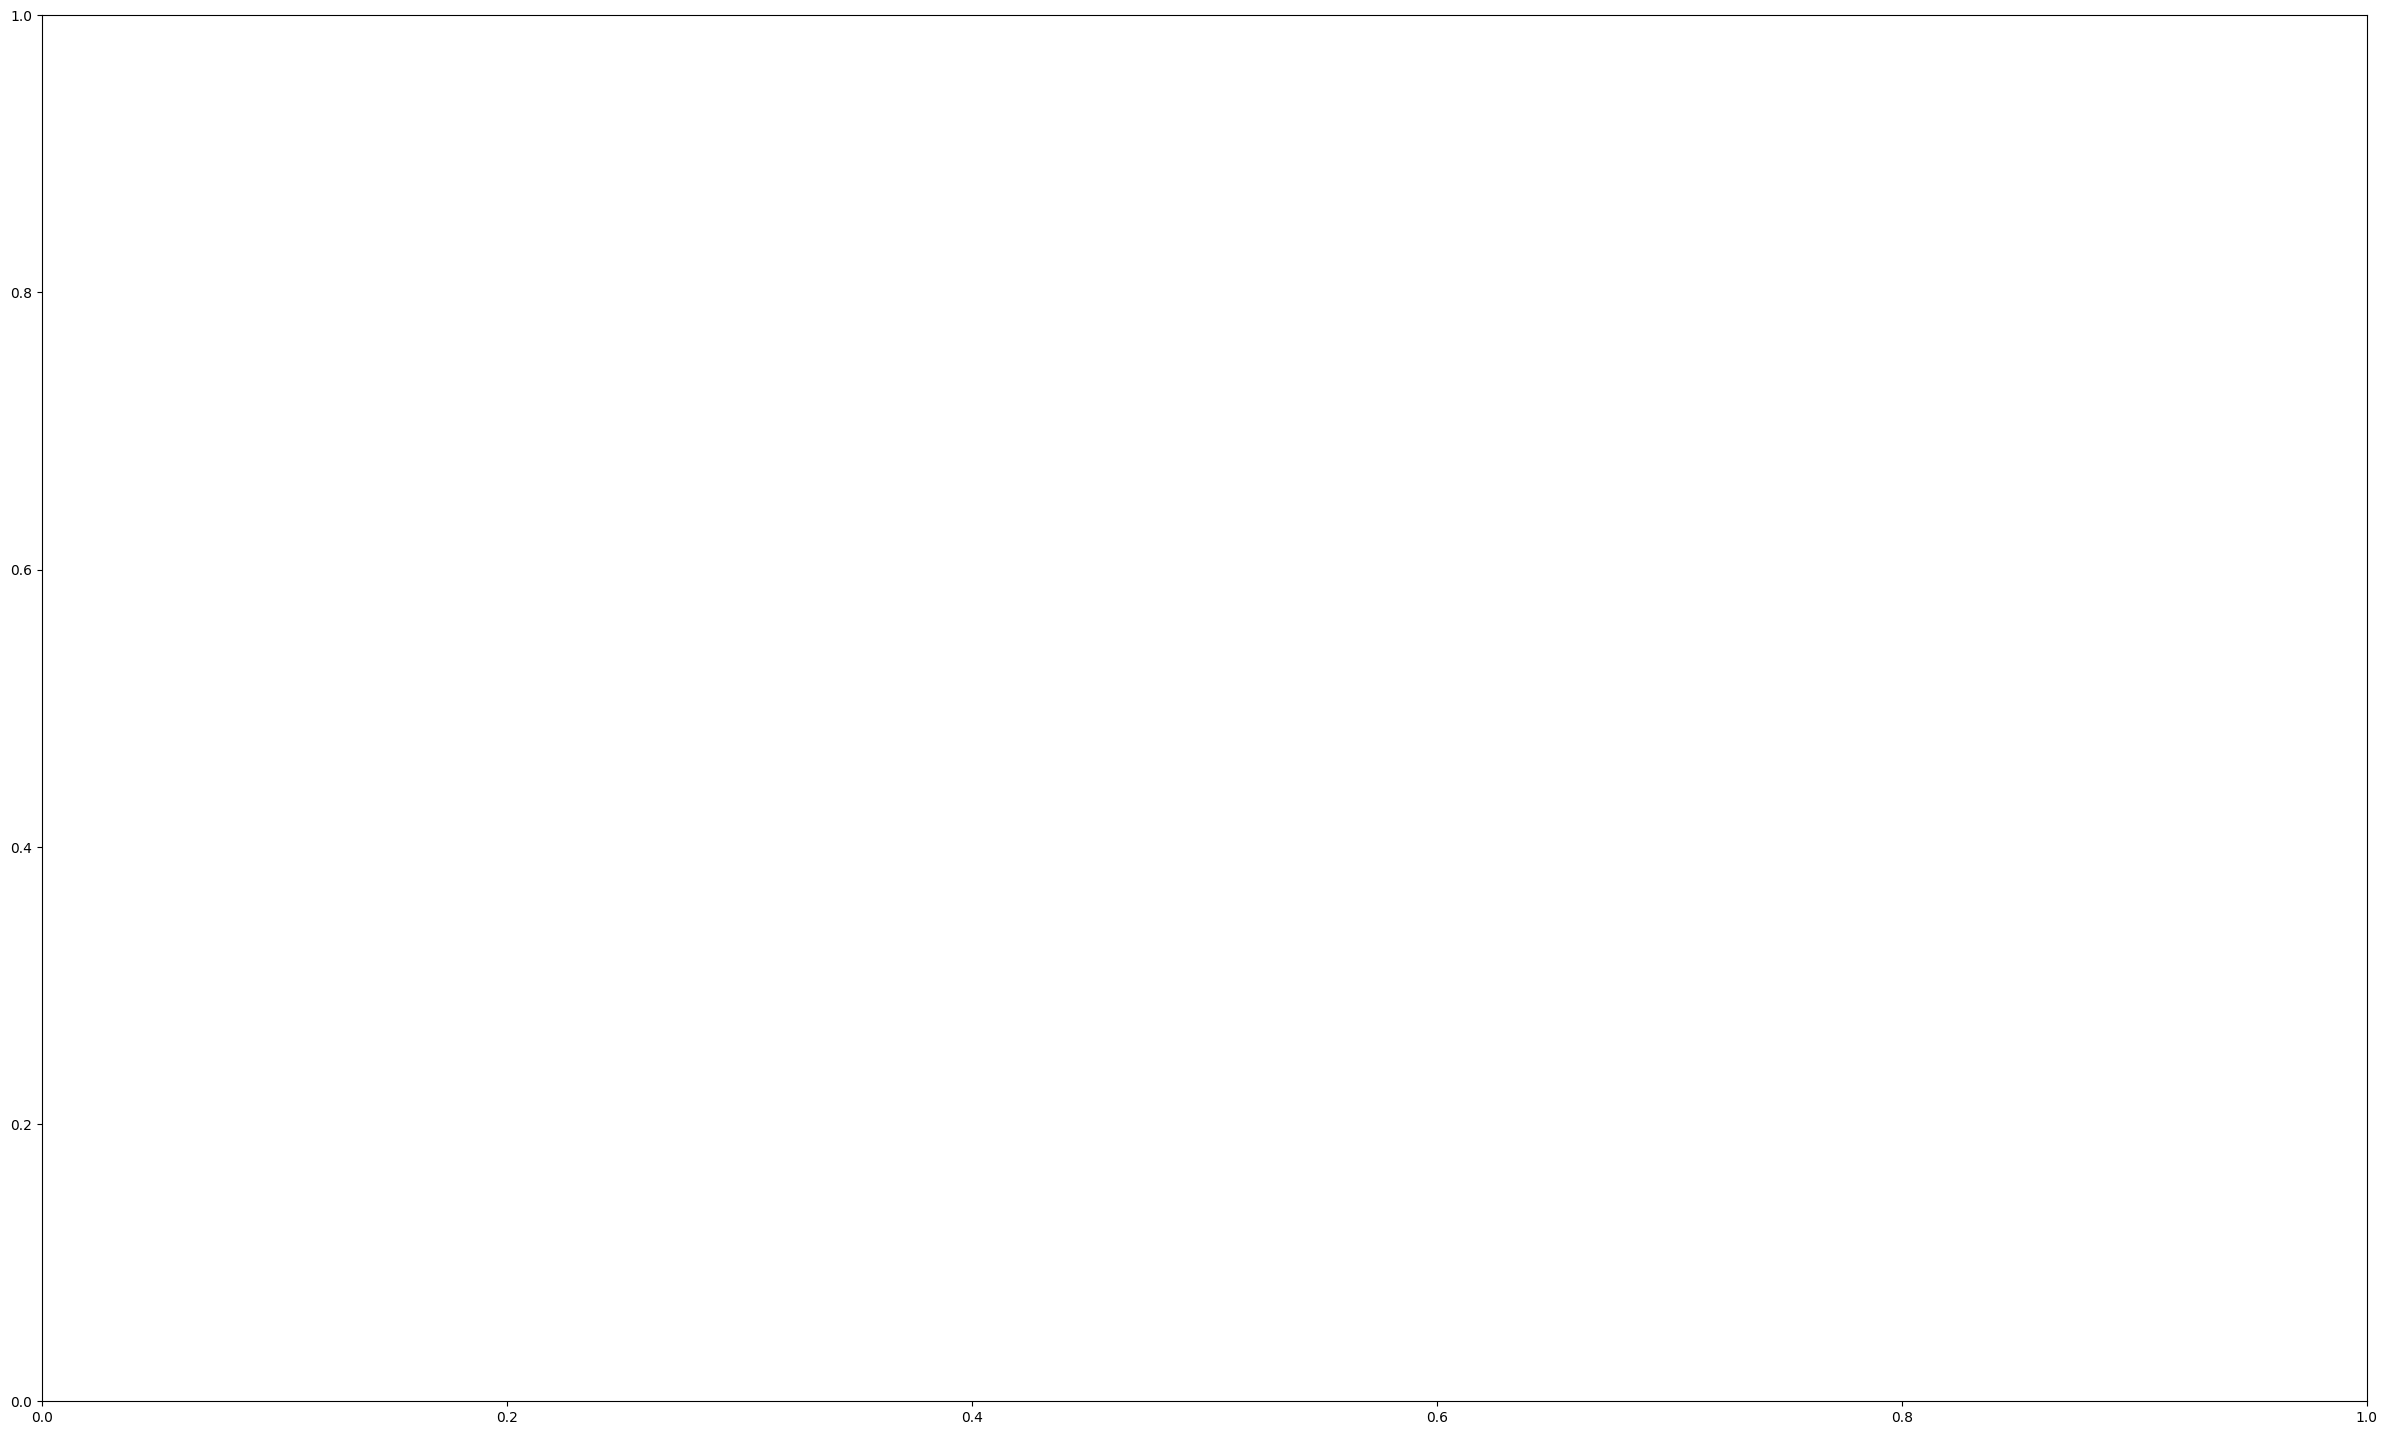

In [443]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels)
plt.show()

In [ ]:

fig, ax = plt.subplots()

In [ ]:
color_map = {0:'red', 1:'yellow', 2:'orange', 3:'green', 4:'cyan', 5:'grey'}
colors = list(map(color_map.get, labels))

In [ ]:
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)

In [ ]:
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

In [ ]:
ax.add_artist(legend1)

In [ ]:
plt.show()

In [ ]:
fig

In [ ]:
scatter.legend_elements()

In [ ]:
X_embedded.shape[0]

In [ ]:
X_embedded.shape[0]//2

In [ ]:
X_embedded_combined = X_embedded[:X_embedded.shape[0]//2, :]

In [ ]:
X_embedded_combined

In [ ]:
X_embedded_local = X_embedded[X_embedded.shape[0]//2:, :]

In [ ]:
X_embedded_local

In [ ]:
x_diff = X_embedded_local - X_embedded_combined

In [ ]:
x_diff

In [ ]:
labels

In [ ]:
import torch
cos = torch.nn.CosineEmbeddingLoss()

In [ ]:
a = torch.Tensor([[0,0, 0, 0, 0]])
b = torch.Tensor([[0,0, 0, 0, 0]])
y = torch.Tensor([-1,])
cos(a,b, y)

In [ ]:
cos_sim = torch.nn.CosineSimilarity()
cos_sim(a,b)